In [636]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn

from IPython.display import display

%matplotlib inline

In [637]:
pd.options.display.max_rows = 15

След това зареждаме данните:

In [638]:
pd.read_csv('data/titanic/train.csv')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


`PassengerId` изглежда като иднекс, който няма да ни даде нищо интересно. Може да отрежем колоната, но pandas има трик за целта:

In [639]:
original = pd.read_csv('data/titanic/train.csv', index_col='PassengerId')
original

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S


Какво ли значат тези данни? Може да видим в Kaggle:

| Variable | Definition                                 | Key                                            |
|:---------|:-------------------------------------------|:-----------------------------------------------|
| Survived | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |


Да видим малко статистика:

In [640]:
original.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Забелязва се, че не всички колони имат стойности - например Age. Нека да видим какво е положението при другите:

In [641]:
original.isnull().sum().sort_values()

Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
Age         177
Cabin       687
dtype: int64

Трябва да решим този проблем. Анализът ни на трите колони е следния:

* Липсват само две `Embarked` – може да ги попълним както си искаме, няма да има голямо значение.
* Повечето `Cabin` липсват – едва ли може да извлечем интересна информация от там (ако не се постараем твърде много) и може да игнорираме колоната
* `Age` вече е проблем – трябва да изберем какво да направим.

## Обработка на Age

Опциите ни са:

1. Да разкараме редовете
2. Да попълним с нули
3. Да попълним със средната стойност на колоната
4. Да направим някаква магия

1 не е опция, понеже ще загубим около 20% от данните. Dataset-а е малък. 2 също не е най-доброто решение, понеже ще измести данните твърде много в една посока. Понеже още не сме магьосници, ще почнем с 3.

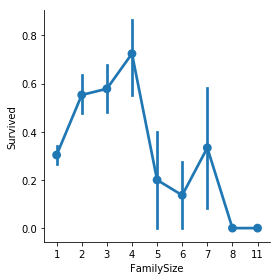

In [642]:
data = original.copy()
data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
sns.factorplot('FamilySize', 'Survived', data=data);

In [643]:
data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand=False)

pd.options.display.max_rows = 20
data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Countess      1
Mme           1
Capt          1
Jonkheer      1
Don           1
Ms            1
Lady          1
Sir           1
Name: Title, dtype: int64

Нека да посъберем титлите. Първо, малко френски (и правописни грешки):

In [644]:
data.loc[data.Title == 'Mlle', 'Title'] = 'Miss'
data.loc[data.Title == 'Mme', 'Title']  = 'Mrs'
data.loc[data.Title == 'Ms', 'Title']   = 'Miss'

In [645]:
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Don', 'Jonkheer', 'Capt', 'Lady', 'Sir']
data.Title = data.Title.replace(rare_titles, 'Rare')
data.Title.value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

Идея – дали не може да ползваме титлата да си попълним възрастта?

In [646]:
age_by_title = data.groupby('Title').Age.mean()
age_by_title

Title
Master     4.574167
Miss      21.845638
Mr        32.368090
Mrs       35.788991
Rare      45.545455
Name: Age, dtype: float64

In [647]:
#Disabling the because I don't care about the original data and don't know what else to do.
pd.options.mode.chained_assignment = None

In [648]:
#for index, row in data.iterrows():
#        data['Age'][index] = age_by_title[data['Title'][index]]

In [649]:
data = original.copy()
data['Age'] = data.Age.fillna(data.Age.mean())
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S


In [650]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S


# Enough – следва feature engineering

Разгледахме данните достатъчно. Нека започнем начисто и да си попълним данните с новите feature-и които открихме.

Оригиналните данни бяха в `original`. Нека попълним титлите отново.

In [651]:
data = original.copy()

data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand=False)
data.loc[data.Title == 'Mlle', 'Title'] = 'Miss'
data.loc[data.Title == 'Mme', 'Title']  = 'Mrs'
data.loc[data.Title == 'Ms', 'Title']   = 'Miss'

rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Don', 'Jonkheer', 'Capt', 'Lady', 'Sir']
data.Title = data.Title.replace(rare_titles, 'Rare')

След това нека попълним липсващите възрасти:

In [652]:
data['Age'] = data.Age.fillna(data.Age.mean())

In [653]:
#data.loc[data.Age.isnull() & (data.Title == 'Mr'), 'Age'] = age_by_title['Mr']
#data.loc[data.Age.isnull() & (data.Title == 'Mrs'), 'Age'] = age_by_title['Mrs']
#data.loc[data.Age.isnull() & (data.Title == 'Miss'), 'Age'] = age_by_title['Miss']
#data.loc[data.Age.isnull() & (data.Title == 'Master'), 'Age'] = age_by_title['Master']
#data.loc[data.Age.isnull() & (data.Title == 'Rare'), 'Age'] = age_by_title['Rare']

Да видим какво се получи:

In [654]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Title         0
dtype: int64

Дали не сме омазали нещо?

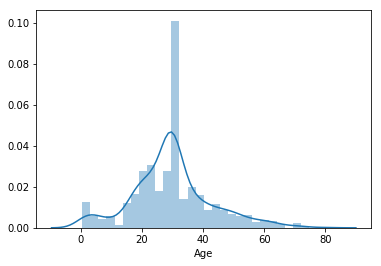

In [655]:
sns.distplot(data.Age);

Всякаш не сме.

Нека попълним двете липсващи `Embarked` с `S`, който е най-популярния.

In [656]:
data.Embarked = data.Embarked.fillna('S')
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
Title         0
dtype: int64

Остана само `Cabin`, който решихме, че не ни интересува:

In [657]:
data = data.drop('Cabin', axis=1)

Нека си добавим и `FamilySize`:

In [658]:
data['FamilySize'] = data.Parch + data.SibSp + 1
data = data.drop(['Parch', 'SibSp'], axis=1)

Готови сме!

In [659]:
data

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Title,FamilySize
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,Mr,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C,Mrs,2
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,Miss,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S,Mrs,2
5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,Mr,1
6,0,3,"Moran, Mr. James",male,29.699118,330877,8.4583,Q,Mr,1
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,17463,51.8625,S,Mr,1
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,349909,21.0750,S,Master,5
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,347742,11.1333,S,Mrs,3


Последна проверка:

In [660]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
Ticket        0
Fare          0
Embarked      0
Title         0
FamilySize    0
dtype: int64

In [661]:
data.describe()

,Survived,Pclass,Age,Fare,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208,1.904602
std,0.486592,0.836071,13.002015,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,1.000000
25%,0.000000,2.000000,22.000000,7.910400,1.000000
50%,0.000000,3.000000,29.699118,14.454200,1.000000
75%,1.000000,3.000000,35.000000,31.000000,2.000000
max,1.000000,3.000000,80.000000,512.329200,11.000000


Всичко изглежда наред!

Нека се пробваме да потренираме модели! Но първо да си запишем новите данни някъде:

In [662]:
transformed = data.copy()

# Логистична регресия

Нека се пробваме с логистична регресия. Да припомним, моделът е същия като линейната, само че минава през сигмоид:

$$S(x) = \frac{1}{1 + e^{-x}}$$

Графиката на функцията изглежда така:

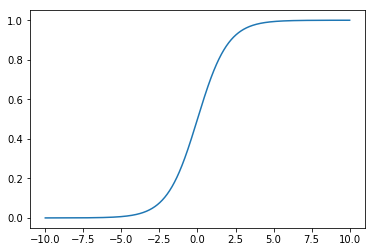

In [663]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

interval = np.linspace(-10, 10, num=1000)
plt.plot(interval, sigmoid(interval));

И формулата на модела е:

$$y = S(a_0 + a_1x_1 + a_2x_2 + \ldots + a_nx_n)$$

Където:

* $a_i$ е теглото на определен feature (и $a_0$ е константа, открита от модела)
* $x_i$ е $i$-тия feature

Понеже това е линеен модел, трябва да обработим малко данните да стигнем до числа.

In [664]:
transformed.head(6)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Title,FamilySize
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,Mr,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C,Mrs,2
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,Miss,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S,Mrs,2
5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,Mr,1
6,0,3,"Moran, Mr. James",male,29.699118,330877,8.4583,Q,Mr,1


Ще one-hot encode-нем `Sex`, `Title` и `Embarked` по селския начин (без да ползваме one-hot).

In [665]:
data = transformed.copy()
data['IsMale']    = (data.Sex == 'male').astype(float)
data['IsFemale']  = (data.Sex == 'female').astype(float)
data['IsMr']      = (data.Title == 'Mr').astype(float)
data['IsMrs']     = (data.Title == 'Mrs').astype(float)
data['IsMiss']    = (data.Title == 'Miss').astype(float)
data['IsMaster']  = (data.Title == 'Master').astype(float)
data['IsRare']    = (data.Title == 'Rare').astype(float)
data['EmbarkedC'] = (data.Embarked == 'C').astype(float)
data['EmbarkedQ'] = (data.Embarked == 'Q').astype(float)
data['EmbarkedS'] = (data.Embarked == 'S').astype(float)

data = data.drop(['Sex', 'Embarked', 'Title'], axis=1)

In [666]:
data.head(10)

,Survived,Pclass,Name,Age,Ticket,Fare,FamilySize,IsMale,IsFemale,IsMr,IsMrs,IsMiss,IsMaster,IsRare,EmbarkedC,EmbarkedQ,EmbarkedS
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.000000,A/5 21171,7.2500,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,PC 17599,71.2833,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,3,"Heikkinen, Miss. Laina",26.000000,STON/O2. 3101282,7.9250,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,113803,53.1000,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0,3,"Allen, Mr. William Henry",35.000000,373450,8.0500,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0,3,"Moran, Mr. James",29.699118,330877,8.4583,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0,1,"McCarthy, Mr. Timothy J",54.000000,17463,51.8625,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0,3,"Palsson, Master. Gosta Leonard",2.000000,349909,21.0750,5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,347742,11.1333,3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Ще изрежем и другите колони, които не ни интересуват:

In [667]:
data = data.drop(['Name', 'Ticket', 'Fare'], axis=1)
data.head(5)

,Survived,Pclass,Age,FamilySize,IsMale,IsFemale,IsMr,IsMrs,IsMiss,IsMaster,IsRare,EmbarkedC,EmbarkedQ,EmbarkedS
PassengerId,,,,,,,,,,,,,,
1,0,3,22.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,38.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,3,26.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,1,35.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0,3,35.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Да приготвим dataset:

In [668]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [669]:
X.head()

,Pclass,Age,FamilySize,IsMale,IsFemale,IsMr,IsMrs,IsMiss,IsMaster,IsRare,EmbarkedC,EmbarkedQ,EmbarkedS
PassengerId,,,,,,,,,,,,,
1,3,22.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,38.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,26.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,35.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,3,35.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [670]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

Да тренираме модел!

Drumroll...

In [671]:
model = LogisticRegression()
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.839820359281
test score:  0.80269058296


Вдигнахме резултата с около 10%! Това въобще не е за подценяване. Нека да видим какви тегла откри модела.

In [672]:
def logistic_regression_features(X, model):
    plt.figure(figsize=(12,8))
    barplot = sns.barplot(x=X.columns, y=model.coef_[0], orient='vertical')
    plt.setp(barplot.get_xticklabels(), rotation=90)
    plt.grid(True)

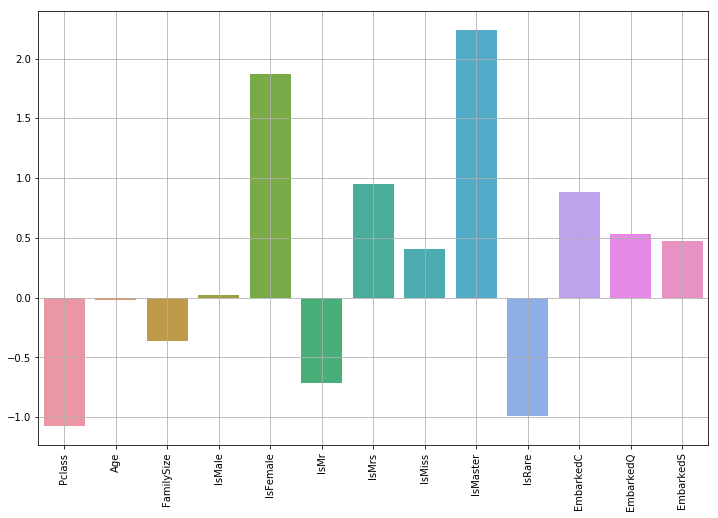

In [673]:
logistic_regression_features(X, model)

Много любопитно. Съвпада с интуицията ни. Обърнете внимане, че колкото е по-голямо число е класата, толкова по-малък е шанса за оцеляване. Аналогично и за възрастта.

# Линейни модели и непрекъснати feature-и

Линейните модели не се оправят много добре с непрекъснати feature-и, когато корелацията е линейна. Ако първа класа има точно 3 пъти по-голям шанс за оцеляване от трета, това би било ОК, но ситуацията едва ли е такава. Има аналогичен случай и за възрастта.

Нека първо да пробваме да one-hot encode-нем класата.

In [674]:
data['Class1'] = (data.Pclass == 1).astype(float)
data['Class2'] = (data.Pclass == 2).astype(float)
data['Class3'] = (data.Pclass == 3).astype(float)
data = data.drop('Pclass', axis=1)
data.head()

,Survived,Age,FamilySize,IsMale,IsFemale,IsMr,IsMrs,IsMiss,IsMaster,IsRare,EmbarkedC,EmbarkedQ,EmbarkedS,Class1,Class2,Class3
PassengerId,,,,,,,,,,,,,,,,
1,0,22.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,38.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,26.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,35.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,0,35.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Да тренираме пак:

In [675]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.839820359281
test score:  0.807174887892


Успяхме да вдигнем точността. Да видим дали бяхме прави?

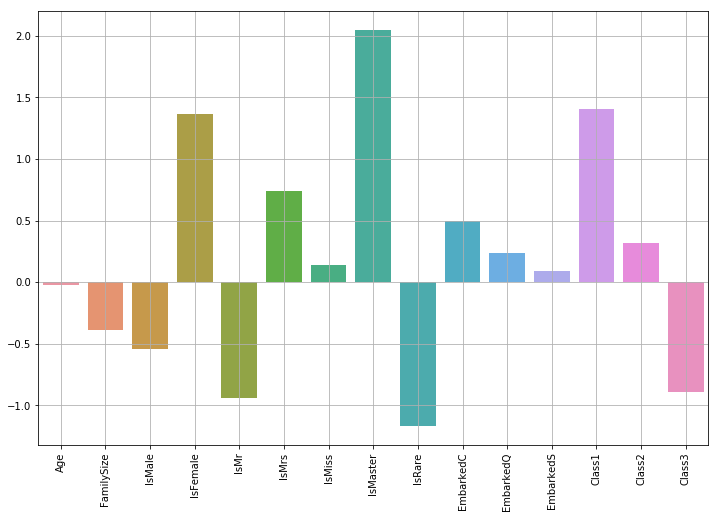

In [676]:
logistic_regression_features(X, model)

Не си личи твърде ясно от графиката, но не са съвсем на една права:

In [677]:
coefficients = model.coef_[0]
(coefficients[-2] - coefficients[-1], coefficients[-3] - coefficients[-2])

(1.2128198575292601, 1.0844259774782228)

Може да пробваме да приложим тази идея върху age – видяхме по-рано, че връзката между вързастта и оцеляваемостта не е съвсем линеайна. Може да превърнем `Age` от непрекъснат атрибут в категория и после да я one-hot encode-нем.

Това се нарича binning.

Да пробваме да ги разделим на две категори, спрямо това дали имат 18 или не:

In [678]:
data['IsChild'] = (data.Age < 18).astype(float)
data['IsAdult'] = (18 <= data.Age).astype(float)

data = data.drop('Age', axis=1)

In [679]:
data.head()

,Survived,FamilySize,IsMale,IsFemale,IsMr,IsMrs,IsMiss,IsMaster,IsRare,EmbarkedC,EmbarkedQ,EmbarkedS,Class1,Class2,Class3,IsChild,IsAdult
PassengerId,,,,,,,,,,,,,,,,,
1,0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,1,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
5,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


Тренираме модел:

In [680]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.841317365269
test score:  0.816143497758


Имаме подобрение! Нека да видим как изглеждат новите тегла:

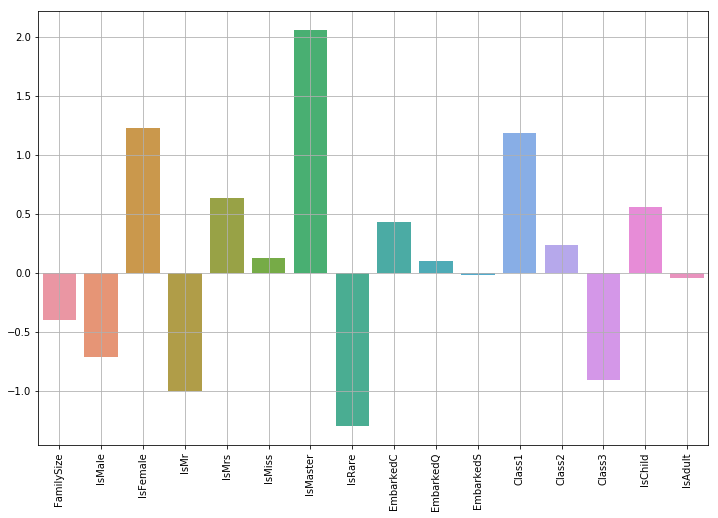

In [681]:
logistic_regression_features(X, model)

Нека да пробваме да bin-нем и размера на семейството.

In [682]:
data['IsAlone']       = (data.FamilySize == 1).astype(float)
data['IsSmallFamily'] = ((2 <= data.FamilySize) & (data.FamilySize < 5)).astype(float)
data['IsLargeFamily'] = (5 <= data.FamilySize).astype(float)

data = data.drop('FamilySize', axis=1)

In [683]:
data.head()

,Survived,IsMale,IsFemale,IsMr,IsMrs,IsMiss,IsMaster,IsRare,EmbarkedC,EmbarkedQ,EmbarkedS,Class1,Class2,Class3,IsChild,IsAdult,IsAlone,IsSmallFamily,IsLargeFamily
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [684]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.839820359281
test score:  0.816143497758


Нямаше никаква промяна. Любопитно.

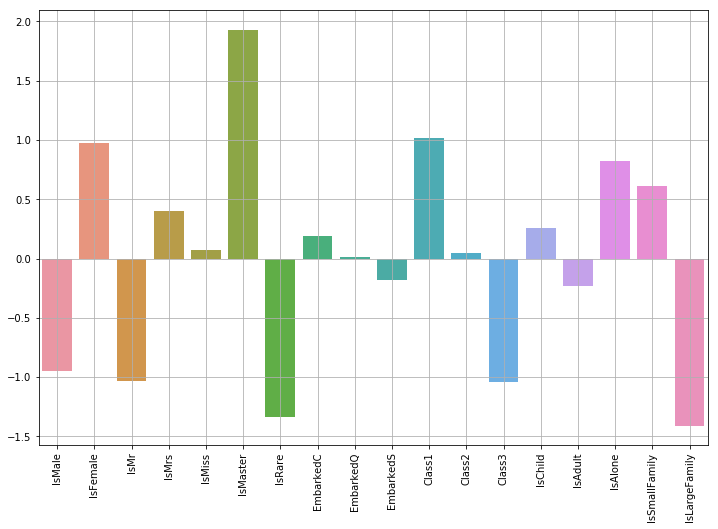

In [685]:
logistic_regression_features(X, model)

Интересно е, че `IsAlone` има по-голямо тегло от `IsSmallFamily`, което не съвпада с първоначалния ни анализ. Може би модела overfit-ва някъде. Но да спрем до тук.

Ще пробваме само с малко регуляризация.

In [686]:
for c in [0.001, 0.003, 0.006, 0.1, 0.3, 0.6, 1.0, 3.0, 6.0]:
    model = LogisticRegression(C=c)
    model.fit(X_train, y_train)
    
    print("C={:f} train: {:f} test: {:f}".format(c, model.score(X_train, y_train), model.score(X_test, y_test)))

C=0.001000 train: 0.699102 test: 0.695067
C=0.003000 train: 0.794910 test: 0.798206
C=0.006000 train: 0.793413 test: 0.789238
C=0.100000 train: 0.832335 test: 0.816143
C=0.300000 train: 0.841317 test: 0.820628
C=0.600000 train: 0.839820 test: 0.816143
C=1.000000 train: 0.839820 test: 0.816143
C=3.000000 train: 0.839820 test: 0.816143
C=6.000000 train: 0.839820 test: 0.816143


Явно стойността по подразбиране `C=1` е достатъчно добра.

# Random Forest

Веднъж видяли резултатите с логистична регресия, може да пробваме друг алгоритъм. Нека се спрем на random forest. Той няма нужда от всичкия този масаж на данни, които приложихме. Но все пак да видим какво ще стане със същите данни:

In [687]:
model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.847305389222
test score:  0.820627802691


Да пуснем и един grid search по параметри:

In [688]:
search = GridSearchCV(model, {'n_estimators': [10, 30, 50, 70, 100],
                              'max_depth': [2, 4, 6, 8, 10, 12, 15]})
search.fit(X, y)

pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(10)

,rank_test_score,mean_test_score,params
7,1,0.832772,"{'max_depth': 4, 'n_estimators': 50}"
9,2,0.831650,"{'max_depth': 4, 'n_estimators': 100}"
6,2,0.831650,"{'max_depth': 4, 'n_estimators': 30}"
8,2,0.831650,"{'max_depth': 4, 'n_estimators': 70}"
5,5,0.823793,"{'max_depth': 4, 'n_estimators': 10}"
12,6,0.822671,"{'max_depth': 6, 'n_estimators': 50}"
13,7,0.821549,"{'max_depth': 6, 'n_estimators': 70}"
10,7,0.821549,"{'max_depth': 6, 'n_estimators': 10}"
14,9,0.819304,"{'max_depth': 6, 'n_estimators': 100}"
19,9,0.819304,"{'max_depth': 8, 'n_estimators': 100}"


Ако вземем най-добрите параметри, получаваме същия резултат за test set-а:

In [689]:
model = RandomForestClassifier(random_state=0, n_estimators=70, max_depth=4).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.839820359281
test score:  0.820627802691


Май нямаше голямо значение.

Да видим какво значение е отдал алгоритъма на feature-ите:

In [690]:
def random_forest_features(model, X):
    importances = model.feature_importances_
    std = np.std([model.feature_importances_ for tree in model.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 10))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), X.columns, rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.show()

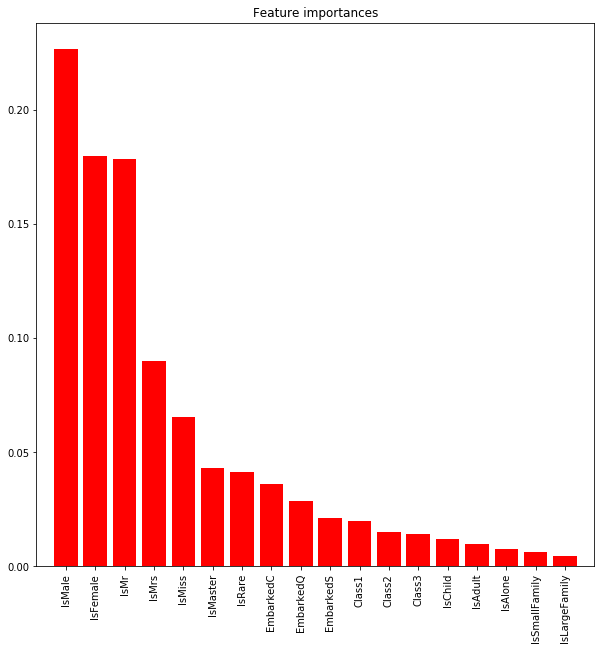

In [691]:
random_forest_features(model, X)

Казахме, че целия този binning е ненужен за RandomForest. Дали няма да се оправи по-добре ако се върнем малко по-назад?

In [692]:
data = transformed.copy()

data['Male'] = (data.Sex == 'male').astype(float)
data['Embarked'] = data.Embarked.apply(lambda x: ['C', 'S', 'Q'].index(x))
data['Title'] = data.Title.apply(lambda x: ['Mr', 'Mrs', 'Miss', 'Master', 'Rare'].index(x))

data = data.drop(['Sex', 'Name', 'Ticket', 'Fare'], axis=1)
data.head()

,Survived,Pclass,Age,Embarked,Title,FamilySize,Male
PassengerId,,,,,,,
1,0,3,22.0,1,0,2,1.0
2,1,1,38.0,0,1,2,0.0
3,1,3,26.0,1,2,1,0.0
4,1,1,35.0,1,1,2,0.0
5,0,3,35.0,1,0,1,1.0


Да тренираме отново:

In [693]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.928143712575
test score:  0.807174887892


Тук има overfitting и има шанс да намерим нещо добро ако потърсим подходящи параметри.

In [694]:
search = GridSearchCV(model, {'n_estimators': [10, 30, 50, 70, 100],
                              'max_depth': [2, 4, 6, 8, 10, 12, 15]})
search.fit(X, y)

pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(10)

,rank_test_score,mean_test_score,params
7,1,0.832772,"{'max_depth': 4, 'n_estimators': 50}"
8,2,0.831650,"{'max_depth': 4, 'n_estimators': 70}"
9,3,0.830527,"{'max_depth': 4, 'n_estimators': 100}"
6,4,0.829405,"{'max_depth': 4, 'n_estimators': 30}"
14,5,0.828283,"{'max_depth': 6, 'n_estimators': 100}"
12,6,0.826038,"{'max_depth': 6, 'n_estimators': 50}"
13,7,0.823793,"{'max_depth': 6, 'n_estimators': 70}"
5,7,0.823793,"{'max_depth': 4, 'n_estimators': 10}"
2,9,0.822671,"{'max_depth': 2, 'n_estimators': 50}"
3,10,0.821549,"{'max_depth': 2, 'n_estimators': 70}"


In [695]:
model = RandomForestClassifier(random_state=0, max_depth=4, n_estimators=70)
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.839820359281
test score:  0.820627802691


Същия резултат.

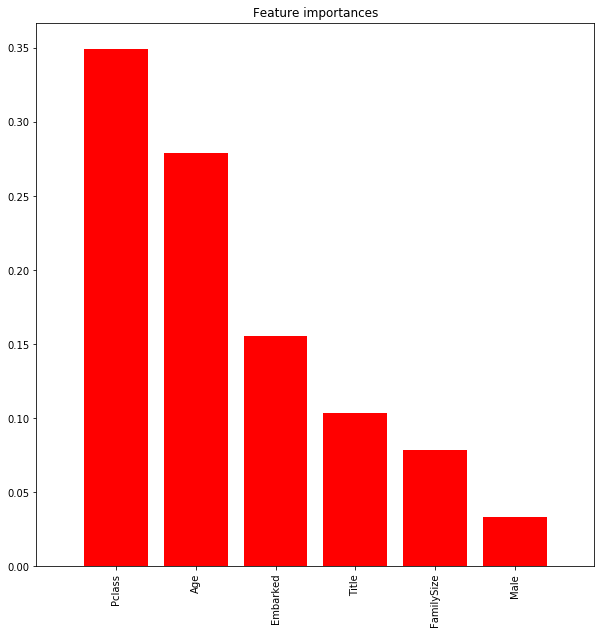

In [696]:
random_forest_features(model, X)

Нека сега да видим как щяхме да се справим с филмът Titanic!

![trio.jpeg](https://img-s-msn-com.akamaized.net/tenant/amp/entityid/AAoTC87.img?h=420&w=624&m=6&q=60&o=f&l=f&x=292&y=169)

Кой от тези тримата ще умре?

Ако поровим в IMDB, може да намерим данните за тях и да си ги трансформираме на ръка:

In [697]:
characters = pd.DataFrame([
    ['Jack Dawson',         3, 19, 1, 0, 1, 1],
    ['Rose DeWitt Bukater', 1, 16, 0, 2, 2, 0],
    ['Caledon Hockley',     1, 29, 0, 0, 2, 1]
], columns=['Name', 'Pclass', 'Age', 'Embarked', 'Title', 'FamilySize', 'Male'])
characters

,Name,Pclass,Age,Embarked,Title,FamilySize,Male
0,Jack Dawson,3,19,1,0,1,1
1,Rose DeWitt Bukater,1,16,0,2,2,0
2,Caledon Hockley,1,29,0,0,2,1


И сега да `predict`-нем:

In [698]:
model.predict(characters.drop('Name', axis=1))

array([0, 1, 0], dtype=int64)

2 от 3! Дори може да се каже, че така е по-добре, защото Кал си заслужаваше да умре.

Нека пробваме submission в Kaggle.

За начало, трябва да взема `test.csv` и да го прекарам през всички тези трансформации. Почвам да съжалявам, че не си направих функция по-рано:

In [699]:
test = pd.read_csv('data/titanic/test.csv', index_col=['PassengerId'])

test['Title'] = test.Name.str.extract('([A-Za-z]+)\.', expand=False)
test['FamilySize'] = test.Parch + test.SibSp + 1
test['Male'] = (test.Sex == 'male').astype(float)
test['Embarked'] = test.Embarked.apply(lambda x: ['C', 'S', 'Q'].index(x))


test.loc[test.Title == 'Mlle', 'Title'] = 'Miss'
test.loc[test.Title == 'Mme', 'Title']  = 'Mrs'
test.loc[test.Title == 'Ms', 'Title']   = 'Miss'

rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Don', 'Jonkheer', 'Capt', 'Lady', 'Sir', 'Dona']
test.Title = test.Title.replace(rare_titles, 'Rare')

test.loc[test.Age.isnull() & (test.Title == 'Mr'), 'Age'] = age_by_title['Mr']
test.loc[test.Age.isnull() & (test.Title == 'Mrs'), 'Age'] = age_by_title['Mrs']
test.loc[test.Age.isnull() & (test.Title == 'Miss'), 'Age'] = age_by_title['Miss']
test.loc[test.Age.isnull() & (test.Title == 'Master'), 'Age'] = age_by_title['Master']
test.loc[test.Age.isnull() & (test.Title == 'Rare'), 'Age'] = age_by_title['Rare']

test['Title'] = test.Title.apply(lambda x: ['Mr', 'Mrs', 'Miss', 'Master', 'Rare'].index(x))

test = test.drop(['Sex', 'Name', 'Ticket', 'Fare', 'Cabin', 'Parch', 'SibSp'], axis=1)

test.head()

,Pclass,Age,Embarked,Title,FamilySize,Male
PassengerId,,,,,,
892,3,34.5,2,0,1,1.0
893,3,47.0,1,1,2,0.0
894,2,62.0,2,0,1,1.0
895,3,27.0,1,0,1,1.0
896,3,22.0,1,1,3,0.0


Да си генерирам с CSV файл:

In [700]:
predictions = model.predict(test)
frame = pd.DataFrame({
    'PassengerId': pd.read_csv('data/titanic/test.csv').PassengerId,
    'Survived': predictions
})
frame = frame.set_index('PassengerId')
frame.to_csv('~/Desktop/predictions.csv')
frame.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
